In [ ]:
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from tensorflow.keras.layers import Input, Lambda, Flatten, Dense
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.applications import vgg16, InceptionV3

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Rice_Disease_Dataset/Train'
valid_path = '/content/drive/MyDrive/Rice_Disease_Dataset/Valid'

In [ ]:
print(validation_generator.class_indices)

In [ ]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87910968/87910968 [==============================] - 5s 0us/step


In [ ]:
for layer in inception.layers:
    layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/Rice_Disease_Dataset/Train/*')

In [ ]:
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Rice_Disease_Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 4777 images belonging to 5 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Rice_Disease_Dataset/Valid',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 661 images belonging to 5 classes.


In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-15-5932e3024fde>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/10
150/150 [==============================] - 3374s 22s/step - loss: 3.3069 - accuracy: 0.6249 - val_loss: 1.8482 - val_accuracy: 0.8094
Epoch 2/10
150/150 [==============================] - 193s 1s/step - loss: 1.9524 - accuracy: 0.7425 - val_loss: 2.3956 - val_accuracy: 0.7110
Epoch 3/10
150/150 [==============================] - 192s 1s/step - loss: 1.9465 - accuracy: 0.7666 - val_loss: 2.8284 - val_accuracy: 0.7519
Epoch 4/10
150/150 [==============================] - 191s 1s/step - loss: 1.8228 - accuracy: 0.7858 - val_loss: 1.5801 - val_accuracy: 0.8487
Epoch 5/10
150/150 [==============================] - 190s 1s/step - loss: 1.7164 - accuracy: 0.7957 - val_loss: 2.5409 - val_accuracy: 0.7958
Epoch 6/10
150/150 [==============================] - 190s 1s/step - loss: 1.9528 - accuracy: 0.7988 - val_loss: 2.0742 - val_accuracy: 0.7837
Epoch 7/10
150/150 [==============================] - 189s 1s/step - loss: 2.0137 - accuracy: 0.8049 - val_loss: 2.9251 - val_accuracy: 0.79

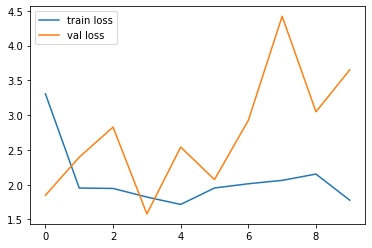

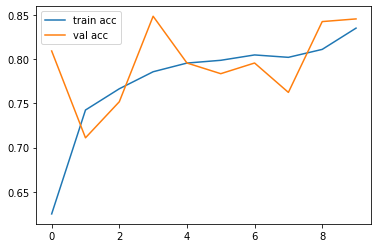

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from tensorflow.keras.models import load_model
model.save('model_inception.h5')

In [ ]:
model = tf.keras.models.load_model("model_inception.h5")

# Convert the model to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

# Save the quantized model
open("my_model_quantized.tflite", "wb").write(tflite_model)

22336968

In [ ]:
import tensorflow as tf
export_path = "modelinception"
tf.keras.models.save_model(model, export_path)
export_path

'modelinception'

In [ ]:
%cp -av YOUR_FOLDER NEW_FOLDER_COPY